## Problem Defination

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

## Target
What is the possability of surviving for each passanger

## Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.metrics import confusion_matrix, classification_report,explained_variance_score

## 1 Explore Data 

In [135]:
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

In [136]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

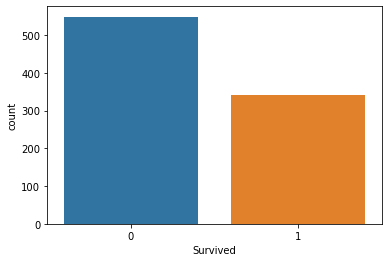

In [16]:
sns.countplot(x='Survived',data=titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

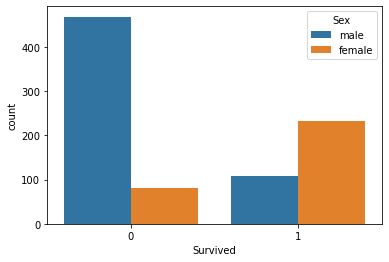

In [18]:
sns.countplot(x='Survived',data=titanic_train,hue='Sex')
    ## Feamale survived more than men
    ## Sex needs to be converted to categorical feature

<AxesSubplot:xlabel='Survived', ylabel='count'>

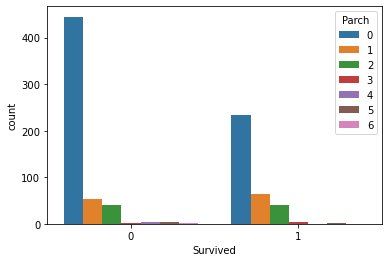

In [58]:
sns.countplot(x='Survived',data=titanic_train,hue='Parch')

<AxesSubplot:xlabel='Survived', ylabel='count'>

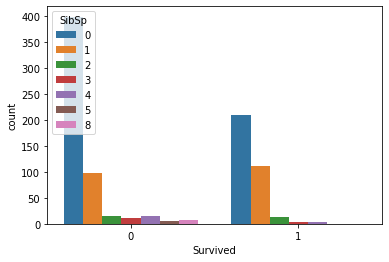

In [59]:
sns.countplot(x='Survived',data=titanic_train,hue='SibSp')

In [61]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Survived', ylabel='count'>

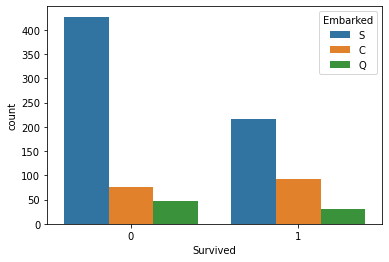

In [63]:
sns.countplot(x='Survived',data=titanic_train,hue='Embarked')
    ## Order of enetering the ship will effect the end result
    ## We should turn it into categorical feature

In [20]:
titanic_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

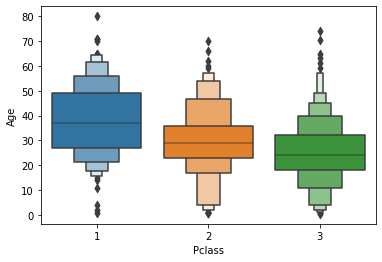

In [27]:
sns.boxenplot(y='Age',x='Pclass',data=titanic_train)
    ## Most of the people in class 3 is people at the age of 27
    ## Most of the people in class 3 is people at the age of 30
    ## Most of the people in class 1 is people at the age of 39

## 2 Feature Engineering

## 2.1 Missing Data

<AxesSubplot:>

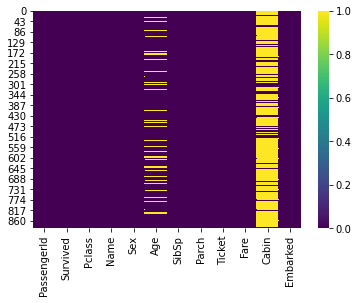

In [137]:
sns.heatmap(titanic_train.isnull(),cmap='viridis')

In [138]:
i=0
for item in titanic_train['Age']:
    if pd.isnull(item):
        if titanic_train['Pclass'][i]==1:
            titanic_train['Age'][i]=39
        elif titanic_train['Pclass'][i]==2:
            titanic_train['Age'][i]=29
        elif titanic_train['Pclass'][i]==3:
            titanic_train['Age'][i]=24         
    i=i+1

<ipython-input-138-0709f0d22dfb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Age'][i]=24
<ipython-input-138-0709f0d22dfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Age'][i]=29
<ipython-input-138-0709f0d22dfb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['Age'][i]=39


<AxesSubplot:>

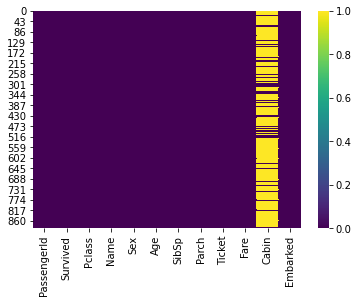

In [139]:
sns.heatmap(titanic_train.isnull(),cmap='viridis')

In [140]:
titanic_train.drop('Cabin',axis=1,inplace=True)

In [141]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

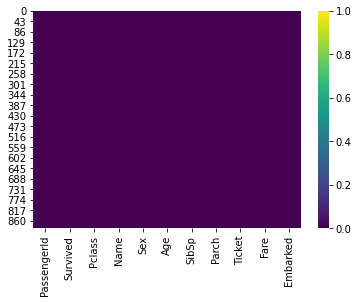

In [99]:
sns.heatmap(titanic_train.isnull(),cmap='viridis')

## 2.2 Dummy Variables

In [142]:
titanic_train['sex']=pd.get_dummies(titanic_train['Sex'],drop_first=True)

In [143]:
Embark=pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [144]:
Embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [145]:
pd.concat([titanic_train,Embark],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


## 2.3 Drop Unnecessary Data

In [134]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'sex'],
      dtype='object')

In [146]:
titanic_train.drop(['Ticket','Name','Embarked','Sex','PassengerId'],axis=1,inplace=True)

In [147]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## 3 Preprocessing

In [184]:
X=titanic_train.drop('Survived',axis=1)

In [185]:
y=titanic_train['Survived']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 4 Train

In [151]:
LogisticReg=LogisticRegression()

In [152]:
LogisticReg.fit(X_train,y_train)

LogisticRegression()

## 5 Prediction

In [153]:
y_pred=LogisticReg.predict(X_test)

## 6 Evaluation

In [196]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[133  21]
 [ 38  76]]

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



## 7 Normalizing the Data (Didn't converge)

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
scaler=MinMaxScaler()

In [189]:
scaler.fit(X_train,y_train)

MinMaxScaler()

In [190]:
X_train=scaler.transform(X_train)

In [191]:
X_test=scaler.transform(X_test)

In [192]:
LogisticRegNorm=LogisticRegression()

In [193]:
LogisticRegNorm.fit(X_train,y_train)

LogisticRegression()

In [197]:
y_predN=LogisticRegNorm.predict(X_test)

In [198]:
print(confusion_matrix(y_test,y_predN))
print()
print(classification_report(y_test,y_predN))

[[136  18]
 [ 40  74]]

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

